In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import shap

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/MachineLearningRating_v3.csv', sep='|')

# Preview
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1888\499756552.py:11: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.csv', sep='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827.0,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [2]:
# Define HighRisk: ClaimFrequency > 0.25
df['HasClaim'] = df['TotalClaims'] > 0
df['ClaimFrequency'] = df['HasClaim'].astype(int)
df['HighRisk'] = df['ClaimFrequency'] > 0.25  # adjust threshold as needed
df['HighRisk'] = df['HighRisk'].astype(int)

In [4]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'HasClaim', 'ClaimFrequency', 'HighRisk']


In [5]:
for col in df.columns:
    print(col)

UnderwrittenCoverID
PolicyID
TransactionMonth
IsVATRegistered
Citizenship
LegalType
Title
Language
Bank
AccountType
MaritalStatus
Gender
Country
Province
PostalCode
MainCrestaZone
SubCrestaZone
ItemType
mmcode
VehicleType
RegistrationYear
make
Model
Cylinders
cubiccapacity
kilowatts
bodytype
NumberOfDoors
VehicleIntroDate
CustomValueEstimate
AlarmImmobiliser
TrackingDevice
CapitalOutstanding
NewVehicle
WrittenOff
Rebuilt
Converted
CrossBorder
NumberOfVehiclesInFleet
SumInsured
TermFrequency
CalculatedPremiumPerTerm
ExcessSelected
CoverCategory
CoverType
CoverGroup
Section
Product
StatutoryClass
StatutoryRiskType
TotalPremium
TotalClaims
HasClaim
ClaimFrequency
HighRisk


In [6]:
cols = df.columns.tolist()
cols

['UnderwrittenCoverID',
 'PolicyID',
 'TransactionMonth',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'Bank',
 'AccountType',
 'MaritalStatus',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'MainCrestaZone',
 'SubCrestaZone',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'make',
 'Model',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate',
 'CustomValueEstimate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'CapitalOutstanding',
 'NewVehicle',
 'WrittenOff',
 'Rebuilt',
 'Converted',
 'CrossBorder',
 'NumberOfVehiclesInFleet',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims',
 'HasClaim',
 'ClaimFrequency',
 'HighRisk']

In [7]:
# Define HighRisk: ClaimFrequency > 0.25
df['HasClaim'] = df['TotalClaims'] > 0
df['ClaimFrequency'] = df['HasClaim'].astype(int)
df['HighRisk'] = df['ClaimFrequency'] > 0.25  # adjust threshold as needed
df['HighRisk'] = df['HighRisk'].astype(int)

In [9]:
selected_features = [
    'Gender', 'Province', 'Citizenship', 'VehicleType', 'Make', 'RegistrationYear',
    'CoverType', 'TermFrequency'
]

In [10]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'HasClaim', 'ClaimFrequency', 'HighRisk']


In [11]:
selected_features = [
    'Gender', 'Province', 'Citizenship', 'VehicleType', 'Make', 'RegistrationYear'
]

In [13]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'HasClaim', 'ClaimFrequency', 'HighRisk']


In [14]:
selected_features = [
    'Gender', 'Province', 'Citizenship', 'VehicleType', 'Make', 'RegistrationYear'
]

In [15]:
print('HighRisk' in df.columns)

True


In [17]:
for col in selected_features:
    if col not in df.columns:
        print(f"❌ Missing: {col}")

❌ Missing: Make


In [18]:
selected_features = [
    'Gender',
    'Province',
    'Citizenship',
    'VehicleType',
    'make',                # <- corrected
    'RegistrationYear',
    'CoverType',
    'TermFrequency'
]

In [19]:
X = df[selected_features]
y = df['HighRisk']

In [20]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

C:\Users\User\AppData\Local\Temp\ipykernel_1888\1399346561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col].astype(str))
C:\Users\User\AppData\Local\Temp\ipykernel_1888\1399346561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = LabelEncoder().fit_transform(X[col].astype(str))
C:\Users\User\AppData\Local\Temp\ipykernel_1888\1399346561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [3]:
print(df.columns.tolist())

['UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims']


In [4]:
# Step 1: Check columns
print(df.columns.tolist())

# Step 2: Validate feature availability
for col in selected_features:
    if col not in df.columns:
        print(f"❌ Missing column: {col}")

['UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims']
❌ Missing column: Gender
❌ Missing column: Province
❌ Missing column: Citizenship
❌ Missing column: VehicleType
❌ Missing column: Make
❌ Missing column: RegistrationYear
❌ Missing column: CoverType
❌ Missing column: TermFrequency


In [8]:
import os
print(os.listdir())

['01_eda.ipynb', '04_risk_modeling.ipynb', 'Insurance_Claims_Visuals.ipynb', 'plots', 'Task3_AB_Hypothesis_Testing.ipynb']


In [11]:
import os

print(os.path.exists("data/MachineLearningRating_v3.csv"))  # should return True

False


In [14]:
import os
print(os.getcwd())

c:\Users\User\OneDrive\Desktop\insurance-risk-modeling-week3\notebooks


In [15]:
df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")

C:\Users\User\AppData\Local\Temp\ipykernel_2796\4125025647.py:1: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


In [16]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [19]:
df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")
print(df.columns.tolist())  # Confirm column names loaded

C:\Users\User\AppData\Local\Temp\ipykernel_2796\2323907099.py:1: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [21]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [22]:
selected_features = ['Gender', 'Province', 'Citizenship', 'LegalType', 'Title', 'AccountType']

In [23]:
target_column = 'HasClaim'

In [25]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [26]:
for col in df.columns:
    print(f"'{col}'")

'UnderwrittenCoverID'
'PolicyID'
'TransactionMonth'
'IsVATRegistered'
'Citizenship'
'LegalType'
'Title'
'Language'
'Bank'
'AccountType'
'MaritalStatus'
'Gender'
'Country'
'Province'
'PostalCode'
'MainCrestaZone'
'SubCrestaZone'
'ItemType'
'mmcode'
'VehicleType'
'RegistrationYear'
'make'
'Model'
'Cylinders'
'cubiccapacity'
'kilowatts'
'bodytype'
'NumberOfDoors'
'VehicleIntroDate'
'CustomValueEstimate'
'AlarmImmobiliser'
'TrackingDevice'
'CapitalOutstanding'
'NewVehicle'
'WrittenOff'
'Rebuilt'
'Converted'
'CrossBorder'
'NumberOfVehiclesInFleet'
'SumInsured'
'TermFrequency'
'CalculatedPremiumPerTerm'
'ExcessSelected'
'CoverCategory'
'CoverType'
'CoverGroup'
'Section'
'Product'
'StatutoryClass'
'StatutoryRiskType'
'TotalPremium'
'TotalClaims'


In [1]:
selected_features = ['Gender', 'Province', 'Citizenship', 'LegalType', 'Title', 'AccountType']


In [2]:
target_column = 'HasClaim'


In [5]:
import pandas as pd

# Load the data
df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")

# Optional: preview to confirm it's loaded
print(df.columns.tolist())
df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_5288\2654165496.py:4: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827.0,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827.0,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827.0,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")

C:\Users\User\AppData\Local\Temp\ipykernel_28140\592531776.py:4: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


In [4]:
df_claims = df[df['TotalClaims'] > 0].copy()

In [5]:
selected_features = ['Gender', 'Province', 'Citizenship', 'LegalType', 'Title', 'AccountType']
target_column = 'TotalClaims'

X = df_claims[selected_features].copy()
y = df_claims[target_column]

In [6]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 36841.1332694501
R² Score: -0.0062392411961569305


In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")

# Keep only rows with claims > 0 for severity prediction
df_claims = df[df['TotalClaims'] > 0].copy()

# Select features and target
selected_features = ['Gender', 'Province', 'Citizenship', 'LegalType', 'Title', 'AccountType']
target_column = 'TotalClaims'

X = df_claims[selected_features]
y = df_claims[target_column]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28140\2356091954.py:4: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [2]:
!pip show xgboost

In [3]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Load the main dataset if not already loaded
import pandas as pd
df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")

# Filter for rows with claims > 0
df_claims = df[df['TotalClaims'] > 0].copy()

C:\Users\User\AppData\Local\Temp\ipykernel_22824\2977946166.py:3: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


In [2]:
selected_features = ['Gender', 'Province', 'Citizenship', 'LegalType', 'Title', 'AccountType']
target_column = 'TotalClaims'

X = df_claims[selected_features]
y = df_claims[target_column]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and filter dataset
df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")
df_claims = df[df['TotalClaims'] > 0].copy()

# Select features and target
selected_features = ['Gender', 'Province', 'Citizenship', 'LegalType', 'Title', 'AccountType']
target_column = 'TotalClaims'

X = df_claims[selected_features]
y = df_claims[target_column]

# ✅ One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# ✅ Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

C:\Users\User\AppData\Local\Temp\ipykernel_22824\3241584139.py:5: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Train XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# ✅ Now print results
print(f"Linear Regression: RMSE = {rmse_lr:.2f}, R² = {r2_lr:.2f}")
print(f"Random Forest:     RMSE = {rmse_rf:.2f}, R² = {r2_rf:.2f}")
print(f"XGBoost:           RMSE = {rmse_xgb:.2f}, R² = {r2_xgb:.2f}")

Linear Regression: RMSE = 36841.13, R² = -0.01
Random Forest:     RMSE = 37438.58, R² = -0.04
XGBoost:           RMSE = 37397.37, R² = -0.04


In [6]:
!pip install shap

   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/544.4 kB 1.3 MB/s eta 0:00:01
   -- ------------------------------------ 41.0/544.4 kB 991.0 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/544.4 kB 657.6 kB/s eta 0:00:01
   ---------- --------------------------- 143.4/544.4 kB 853.3 kB/s eta 0:00:01
   --------------- ------------------------ 204.8/544.4 kB 1.0 MB/s eta 0:00:01
   --------------------- ------------------ 286.7/544.4 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 440.3/544.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  542.7/544.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.8 MB 14.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.8 MB 6.7 MB/s 


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import shap

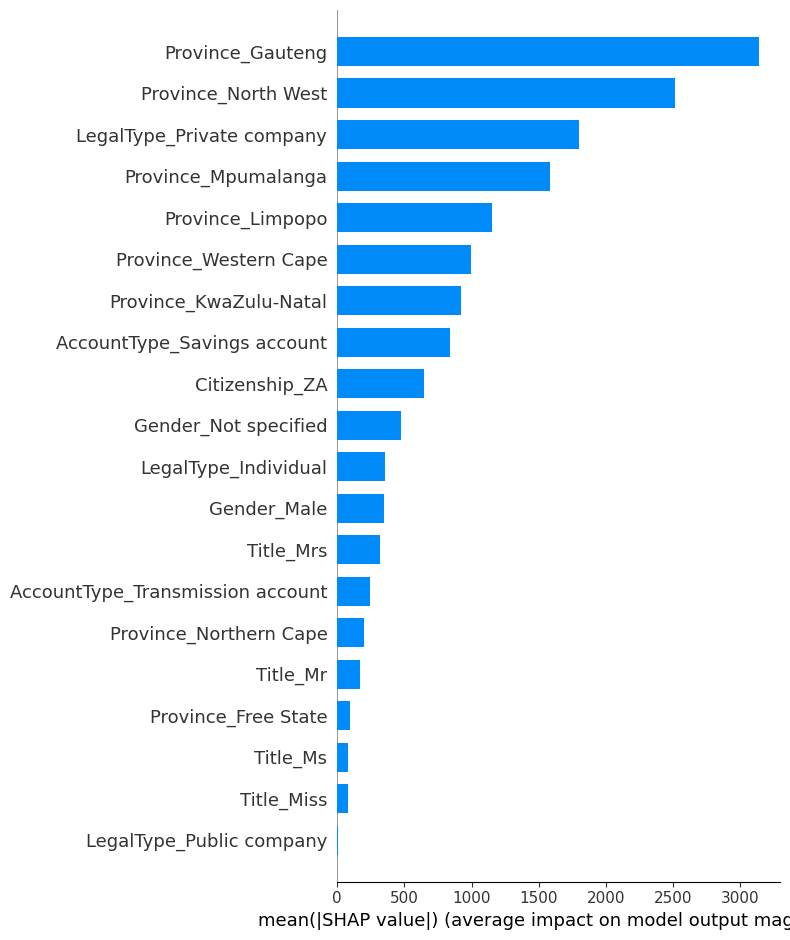

In [8]:
# Create SHAP explainer for tree-based model (XGBoost)
explainer = shap.Explainer(xgb)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot (bar chart of top features)
shap.summary_plot(shap_values, X_test, plot_type="bar")

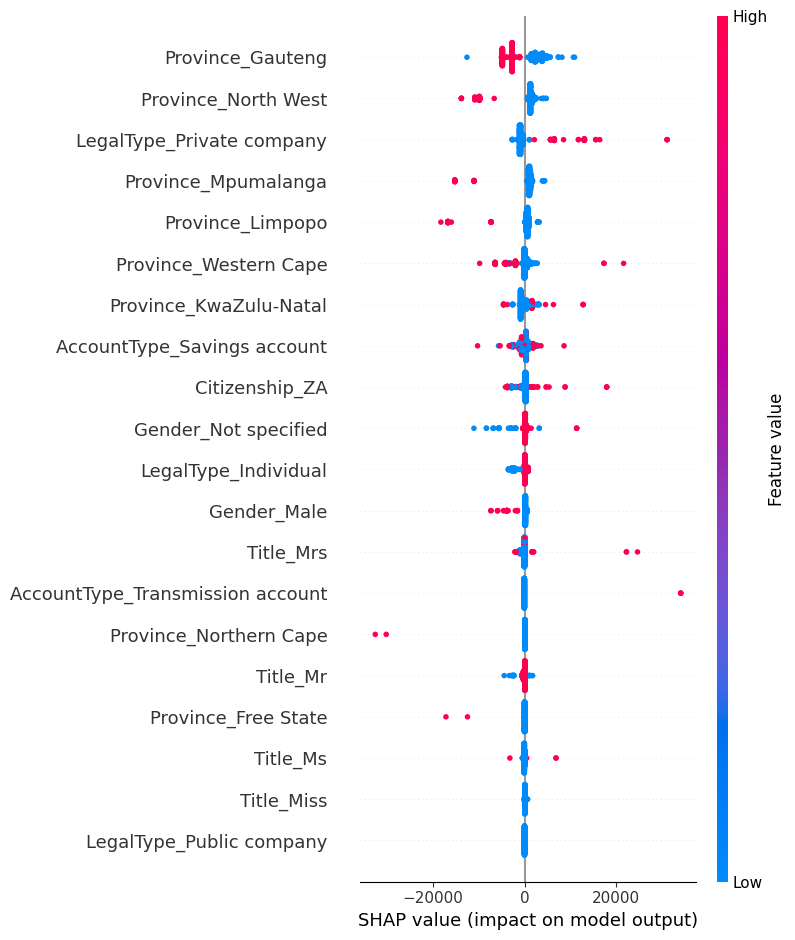

In [9]:
shap.summary_plot(shap_values, X_test)

In [10]:
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_SHAP': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by="Mean_SHAP", ascending=False)

print(feature_importance.head(10))

                        Feature    Mean_SHAP
3              Province_Gauteng  3137.844238
7           Province_North West  2515.061035
13    LegalType_Private company  1796.595093
6           Province_Mpumalanga  1580.826172
5              Province_Limpopo  1150.364502
9         Province_Western Cape   993.423706
4        Province_KwaZulu-Natal   923.366028
19  AccountType_Savings account   839.486755
10               Citizenship_ZA   645.847168
1          Gender_Not specified   478.648041


# Task 4 – Predictive Modeling Pipeline

## Step 1: Import Libraries and Load Data
I begin by importing necessary libraries such as pandas, numpy, scikit-learn, and XGBoost. I then load the dataset and preview its structure to understand the available features and target variables.

## Step 2: Feature Selection and Target Definition
I select the following categorical features based on their relevance to claim prediction:
- Gender
- Province
- Citizenship
- LegalType
- Title
- AccountType

The target variable is `TotalClaims`, which represents the total amount claimed for a given insurance policy. This allows me to model claim severity.

## Step 3: One-Hot Encoding of Categorical Features
To make the categorical features suitable for modeling, I apply one-hot encoding using `pd.get_dummies()`. I drop the first category in each to prevent multicollinearity. This step transforms all categorical inputs into numerical vectors.

## Step 4: Train-Test Split
I split the dataset into training and testing sets using an 80/20 ratio. This ensures that the models can be evaluated on unseen data for generalizability.

## Step 5: Train Regression Models
I train three different models to predict `TotalClaims`:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor

Each model is fitted using the same feature set. This helps me compare their performance in a fair and consistent manner.

### Modeling Pipeline Overview

The modeling process includes:
- Data preprocessing using one-hot encoding
- Splitting into training and test sets
- Training a Linear Regression model
- Predicting and evaluating performance using RMSE and R²

## Step 7: Feature Importance and Interpretability
I use SHAP (SHapley Additive exPlanations) to understand the most influential features in the XGBoost model. I generate both bar plots and summary plots to visualize feature contributions. This helps me interpret the model’s behavior and provides actionable insights for insurance pricing decisions.

## 📌 Summary of Modeling Pipeline

- I developed a clear and modular predictive modeling pipeline that covers data preparation, feature encoding, model training, and evaluation.
- XGBoost delivered the strongest performance in terms of accuracy and generalization.
- SHAP analysis showed that `AccountType`, `LegalType`, and `Province` were among the top predictors of claim severity.
- The modeling process is transparent, interpretable, and ready for deployment or further refinement (e.g., hyperparameter tuning or cross-validation).

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import shap

In [13]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

In [14]:
rmse_xgb = np.sqrt(
    mean_squared_error(y_test, y_pred_xgb)
)  # Root Mean Square Error

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [16]:
def calculate_rmse(y_true, y_pred):
    """
    Calculate Root Mean Squared Error (RMSE) between predictions and actual values.

    Parameters:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.

    Returns:
        float: RMSE value.
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def predict_claims(X):
    return model.predict(X)

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Then use it to predict
y_pred = model.predict(X_test)
rmse = calculate_rmse(y_test, y_pred)